<a href="https://colab.research.google.com/github/YingZhang10/IFTE0024-DAFS-2024.1.7/blob/main/Data_Analytics_and_Fiancial_Strategy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics and Fiancial Strategy

In [ ]:
!rm -rf .git

In [ ]:
%matplotlib inline

In [ ]:
import math
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import statsmodels.tsa.ar_model as smt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## week 2---AR Models (autoregressive models)
** Questions **   
  
𝟏.what is AR model？  
2.why use AR models?  
3.Scenarios and foundations of using AR models?  
4.how to generate AR model ? Theory、data、tools and coding  
5.possible issues？  

**AR definition:** The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term)

The foundation of time series analysis is stationarity

# Example 1: Apple stock closing price


In [ ]:
# Generate AR model： Apple for example
# 1. getting data===return of Apple

stock_data = yf.Ticker("AAPL")
hist = stock_data.history(start="1980-01-01", end="2022-12-31")
hist['Pricediff']=hist['Close'].shift(-1)-hist['Close']
hist['Profit']=hist['Pricediff']/hist['Close']
or_data=hist['Profit']
data=or_data[:-1]

print(hist.head())
print(hist.tail())

#print(hist.shape)
#print(hist.describe())

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.099319  0.099750  0.099319  0.099319  469033600   
1980-12-15 00:00:00-05:00  0.094569  0.094569  0.094137  0.094137  175884800   
1980-12-16 00:00:00-05:00  0.087659  0.087659  0.087228  0.087228  105728000   
1980-12-17 00:00:00-05:00  0.089387  0.089818  0.089387  0.089387   86441600   
1980-12-18 00:00:00-05:00  0.091978  0.092410  0.091978  0.091978   73449600   

                           Dividends  Stock Splits  Pricediff    Profit  
Date                                                                     
1980-12-12 00:00:00-05:00        0.0           0.0  -0.005181 -0.052170  
1980-12-15 00:00:00-05:00        0.0           0.0  -0.006909 -0.073398  
1980-12-16 00:00:00-05:00        0.0           0.0   0.002159  0.024751  
1980-12-17 00:00:00-05:00        0.0           0.0   0.002592  0.0289

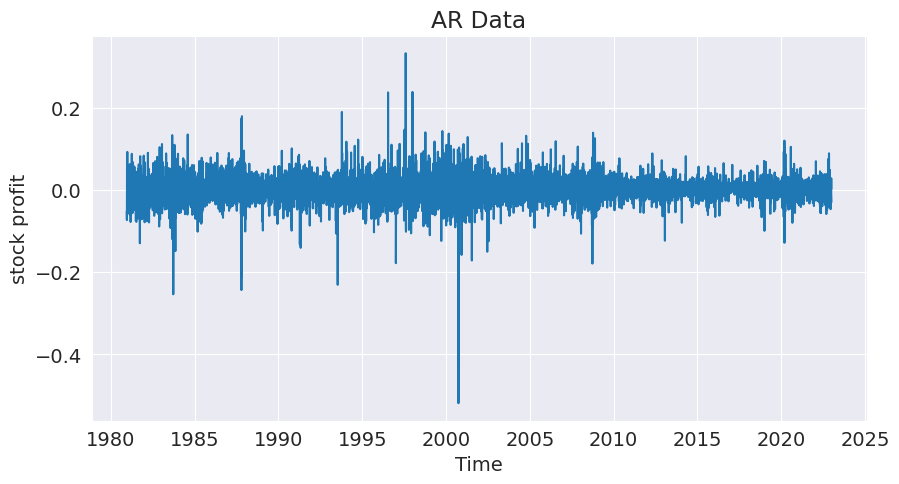

"\nplot_acf(data, lags=20)\nplt.title('Autocorrelation Funciton (ACF)')\nplt.show()\n\n\nplot_pacf(data, lags=20)\nplt.title('Partial Autocorrelation Funciton (PACF)')\nplt.show()\n"

In [ ]:
# 1whether the data is Stationartiy
#---1. Visualizing stock price time series
plt.figure(figsize=(10, 5))

plt.plot(data)
plt.title('AR Data')
plt.xlabel('Time')
plt.ylabel('stock profit')
plt.show()


#---2. Rolling Statistics
'''
rolling_mean = data.rolling(window=10).mean()
rolling_std = data.rolling(window=10).std()
plt.plot(data, label='ture')
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_std, label='rolling standard')
plt.legend()
plt.show()
'''

#---3.ACF and PACF
'''
plot_acf(data, lags=20)
plt.title('Autocorrelation Funciton (ACF)')
plt.show()


plot_pacf(data, lags=20)
plt.title('Partial Autocorrelation Funciton (PACF)')
plt.show()
'''

In [ ]:
result = smt.AutoReg(data, 5).fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Reture   No. Observations:                10602
Model:                     AutoReg(5)   Log Likelihood               22767.691
Method:               Conditional MLE   S.D. of innovations              0.028
Date:                Thu, 21 Dec 2023   AIC                         -45521.381
Time:                        18:55:36   BIC                         -45470.503
Sample:                             5   HQIC                        -45504.209
                                10602                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.992      0.000       0.001       0.002
Reture.L1      0.0163      0.010      1.683      0.092      -0.003       0.035
Reture.L2     -0.0246      0.010     -2.533      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


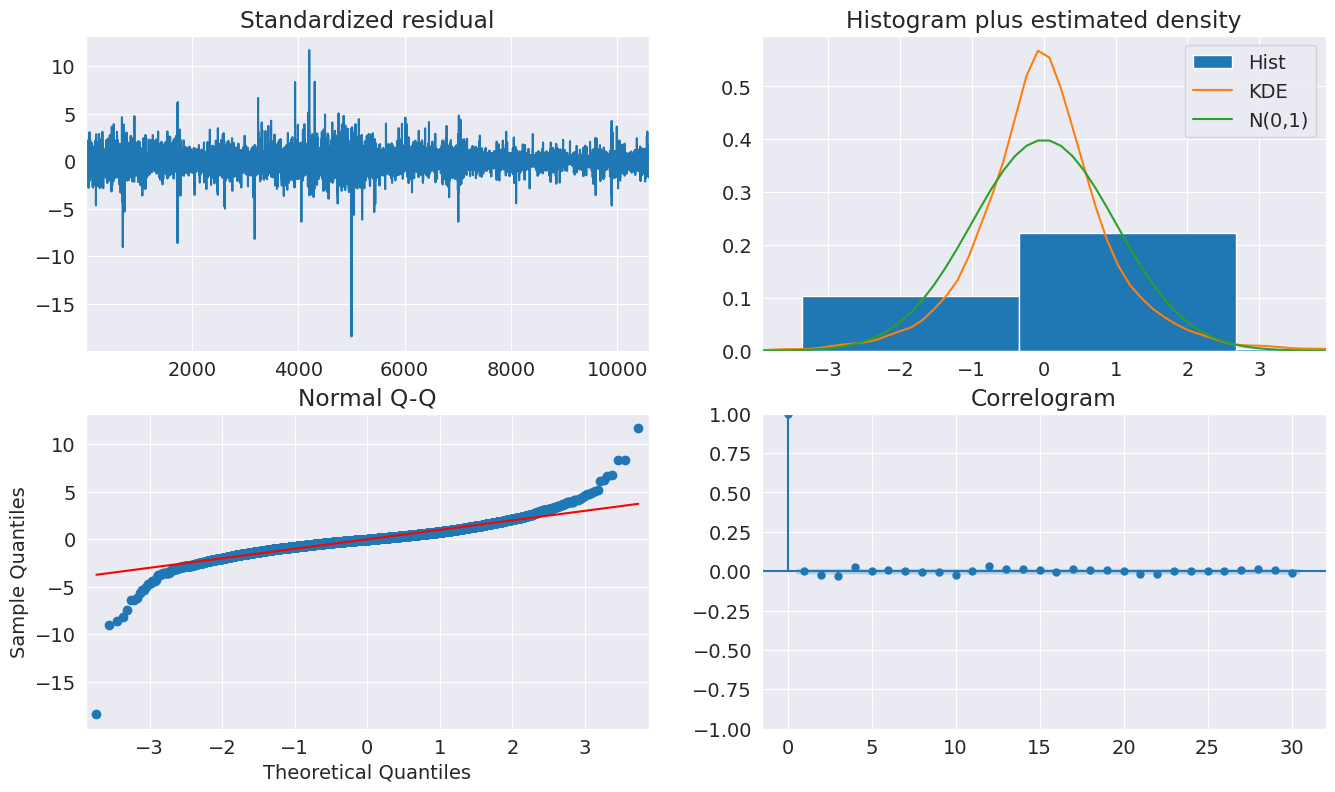

In [ ]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)


fig = plt.figure(figsize=(16, 9))
fig = result.plot_diagnostics(fig=fig, lags=30)

 # Example 2: month-over-month growth rate in U.S. Housing


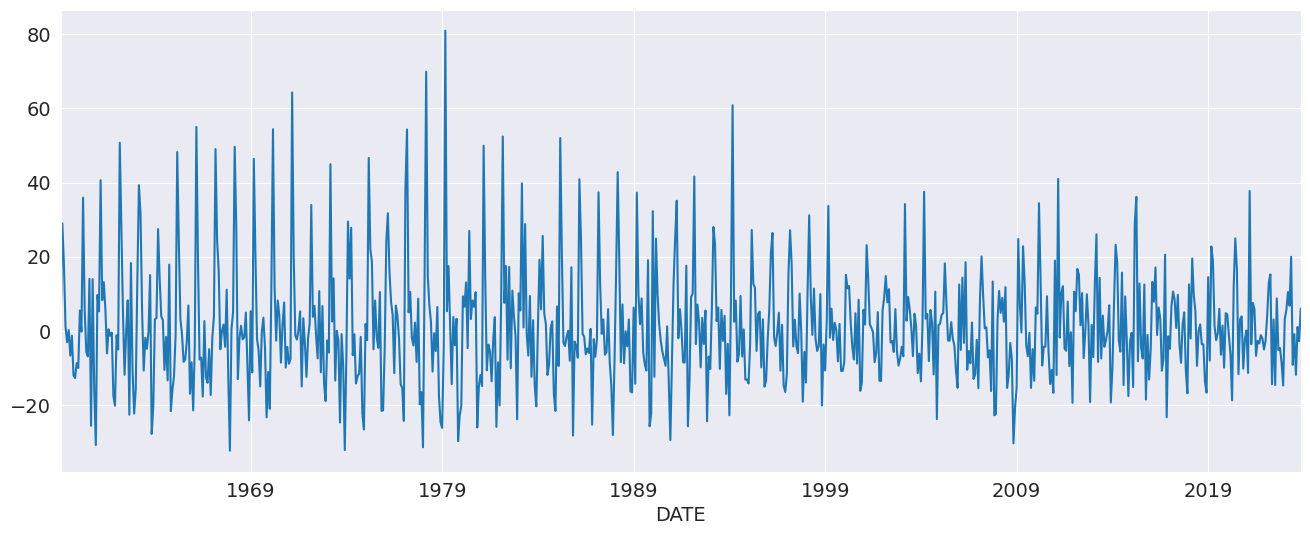

In [ ]:
# for week 3 for seasonal

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2023-12-01")
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)


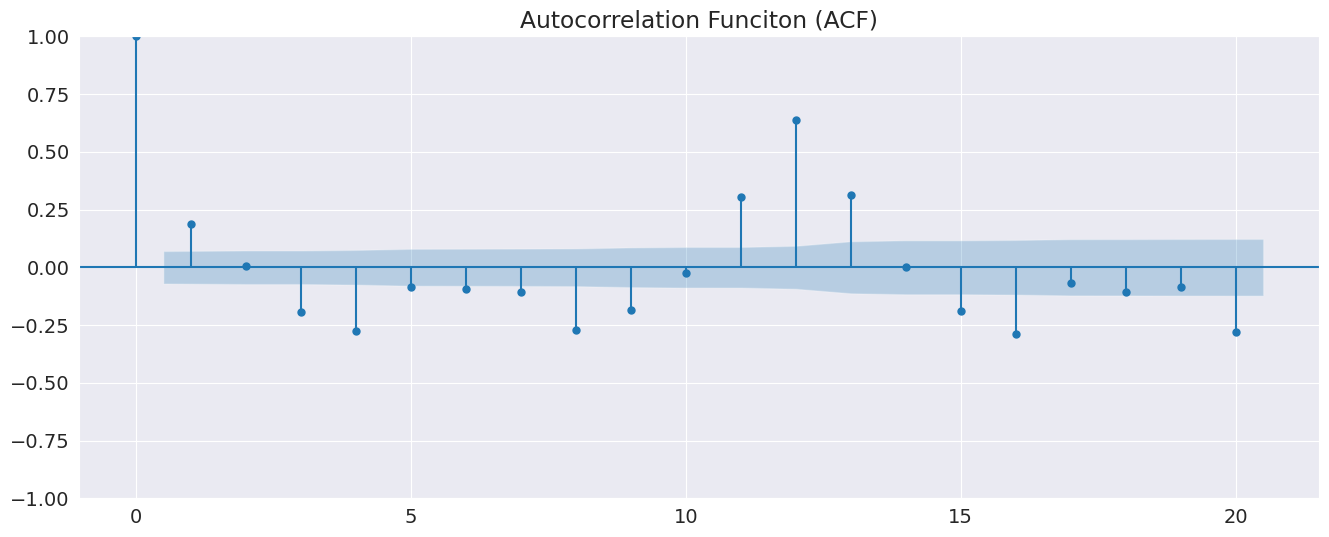

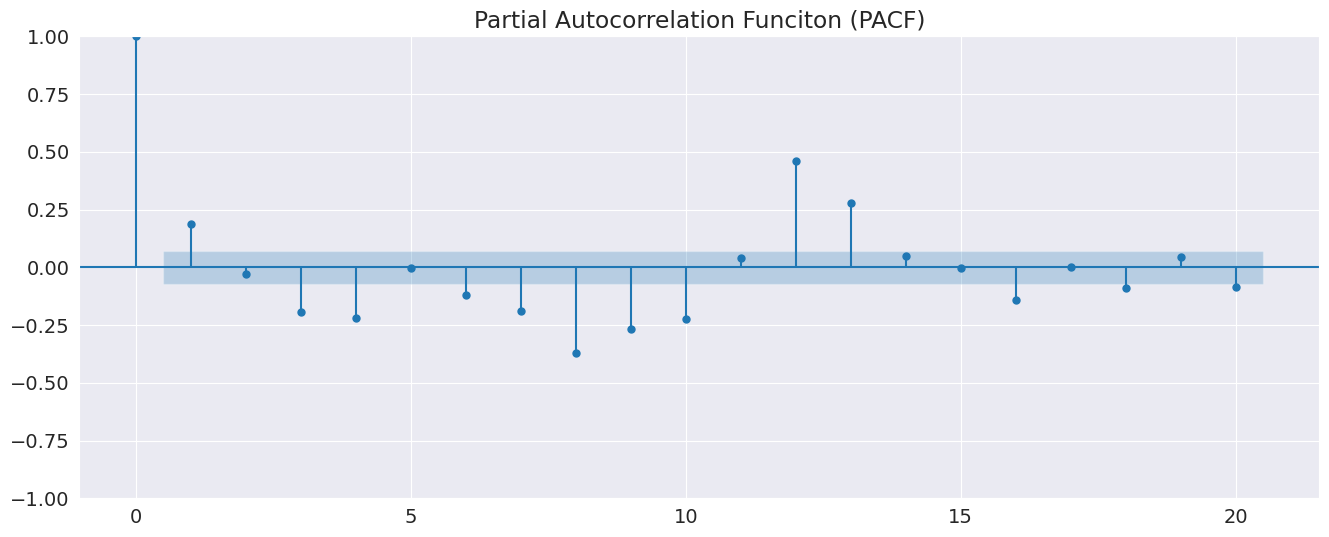

In [ ]:
# ACF and PACF
plot_acf(housing, lags=20)
plt.title('Autocorrelation Funciton (ACF)')
plt.show()

plot_pacf(housing, lags=20)
plt.title('Partial Autocorrelation Funciton (PACF)')
plt.show()

In [ ]:
mod = AutoReg(housing, 14, old_names=False)
result = mod.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  778
Model:                    AutoReg(14)   Log Likelihood               -2878.910
Method:               Conditional MLE   S.D. of innovations             10.478
Date:                Wed, 20 Dec 2023   AIC                           5789.820
Time:                        22:31:52   BIC                           5864.037
Sample:                    04-01-1960   HQIC                          5818.393
                         - 11-01-2023                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4023      0.449      3.121      0.002       0.522       2.283
HOUSTNSA.L1     -0.2881      0.036     -7.996      0.000      -0.359      -0.217
HOUSTNSA.L2     -0.1200      0.036     -3.36

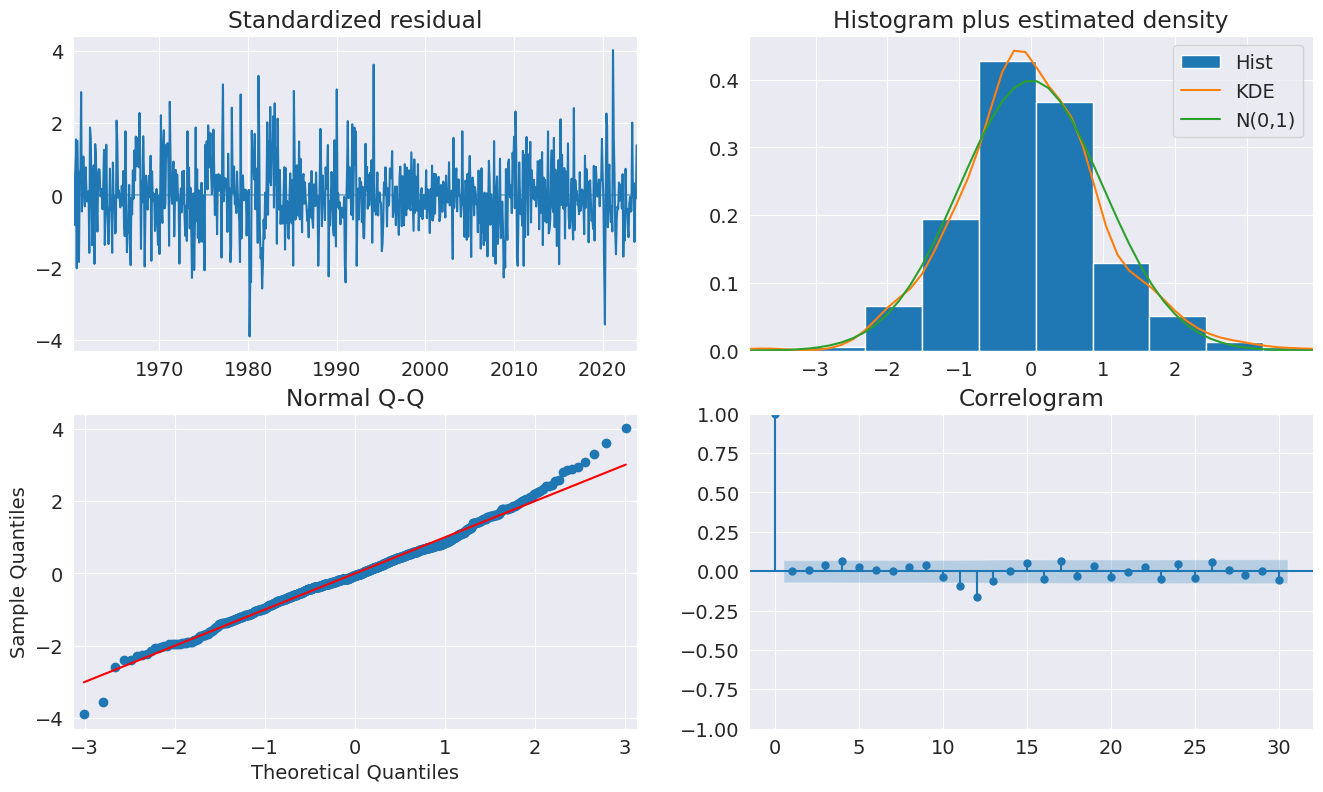

In [ ]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)


fig = plt.figure(figsize=(16, 9))
fig = result.plot_diagnostics(fig=fig, lags=30)